In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
X_train[0].shape

(32, 32, 3)

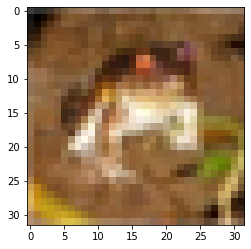

In [8]:
plt.imshow(X_train[0])

In [10]:
X_train[0].max()

255

In [11]:
X_train[0].min()

0

In [12]:
#Normalizing Data

X_train = X_train/255
X_test = X_test/255

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
#Converting target labels into categorical variables using one hot encoding 
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [17]:
y_train[0]

array([6], dtype=uint8)

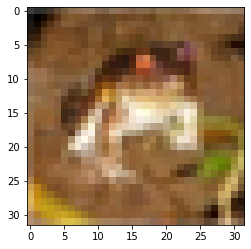

In [18]:
plt.imshow(X_train[0])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

#Output layer
model.add(Dense(10,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [26]:
model.fit(X_train,y_cat_train,epochs=15,validation_data=(X_test,y_cat_test),callbacks=early_stop)

Epoch 1/15
1563/1563 [==============================] - 59s 37ms/step - loss: 1.6770 - accuracy: 0.3877 - val_loss: 1.2714 - val_accuracy: 0.5565
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1912 - accuracy: 0.5793 - val_loss: 1.1064 - val_accuracy: 0.6095
Epoch 3/15
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0259 - accuracy: 0.6427 - val_loss: 1.0820 - val_accuracy: 0.6275
Epoch 4/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9053 - accuracy: 0.6828 - val_loss: 0.9977 - val_accuracy: 0.6607
Epoch 5/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7952 - accuracy: 0.7185 - val_loss: 0.9438 - val_accuracy: 0.6789
Epoch 6/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7186 - accuracy: 0.7470 - val_loss: 1.0451 - val_accuracy: 0.6524
Epoch 7/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6411 - accuracy: 0.7795 - val_loss: 1.0236 -

In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.478085,0.46778,1.271376,0.5565
1,1.155966,0.59122,1.106376,0.6095
2,1.016097,0.64496,1.081988,0.6275
3,0.902122,0.68436,0.997689,0.6607
4,0.803635,0.71802,0.943753,0.6789
5,0.726018,0.74584,1.045055,0.6524
6,0.655448,0.77112,1.023639,0.6714


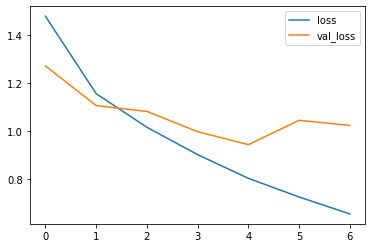

In [30]:
metrics[['loss','val_loss']].plot()

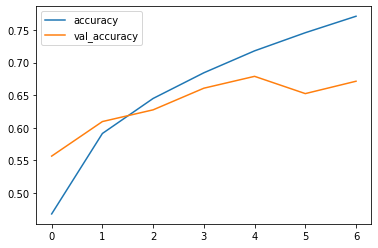

In [31]:
metrics[['accuracy','val_accuracy']].plot()

In [32]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.0236 - accuracy: 0.6714


[1.0236390829086304, 0.6714000105857849]

In [33]:
from sklearn.metrics import  classification_report, confusion_matrix

In [34]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1000
           1       0.75      0.85      0.80      1000
           2       0.58      0.53      0.55      1000
           3       0.52      0.45      0.48      1000
           4       0.48      0.79      0.60      1000
           5       0.73      0.40      0.52      1000
           6       0.63      0.83      0.71      1000
           7       0.81      0.67      0.73      1000
           8       0.84      0.77      0.80      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [36]:
confusion_matrix(y_test,predictions)

array([[730,  30,  54,  16,  58,   5,  22,  11,  51,  23],
       [ 17, 847,   7,  11,  10,   0,  25,   3,  27,  53],
       [ 48,  12, 528,  56, 190,  21, 104,  21,  14,   6],
       [ 24,  25,  84, 450, 176,  85, 106,  26,   7,  17],
       [ 15,   3,  40,  41, 788,   4,  68,  30,   8,   3],
       [ 14,   5,  86, 201, 139, 398,  91,  45,   9,  12],
       [  5,   8,  36,  33,  69,   6, 829,   7,   2,   5],
       [ 12,  13,  36,  26, 164,  20,  38, 672,   1,  18],
       [ 81,  47,  15,  24,  20,   3,  11,   6, 769,  24],
       [ 40, 138,  19,  15,  16,   1,  30,   8,  30, 703]])

In [37]:
import seaborn as sns

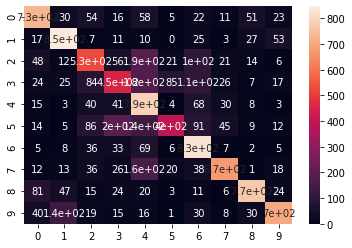

In [38]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [39]:
my_image = X_test[0]

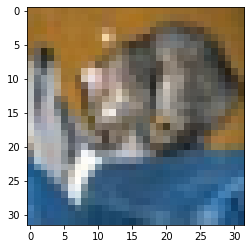

In [40]:
plt.imshow(my_image)

In [41]:
y_test[0]

array([3], dtype=uint8)

In [42]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])